# InSituPy demonstration - Investigate gene expression and cell density along an axis

In [24]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from pathlib import Path
from insitupy import InSituData, CACHE

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [27]:
insitupy_project = Path(CACHE / "out/demo_insitupy_project")

In [28]:
xd = InSituData.read(insitupy_project)
xd.load_all()

In [29]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\Anna Chernysheva\.cache\InSituPy\out\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       Main CellData: main
       matrix
           AnnData object with n_obs × n_vars = 157600 × 297
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'n_genes', 'leiden', 'cell_type_dc'
           var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
           uns: 'cell_type_dc_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'X_pca', 'X_umap', 'annotations', 'ora_estimate', 'ora_pvals', 'regions', 'spatial'
           varm: 'PCs'
           layers: 'counts', 'norm_c

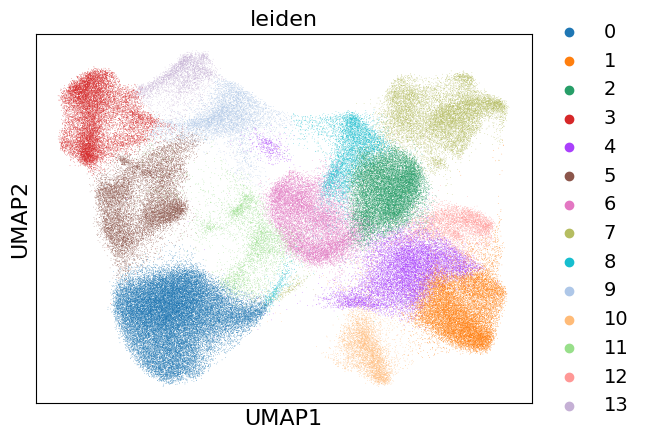

In [31]:
import scanpy as sc
sc.pl.umap(adata=xd.cells["main"].matrix, color="leiden")

## Import annotations

In [32]:
xd.import_annotations(
    files=["./demo_annotations/annotations-Tumor.geojson",
           "./demo_annotations/demo_annotations.geojson",
           "./demo_annotations/demo_points.geojson"],
    keys=["Tumor", "Demo", "Demo"],
    scale_factor=0.2125
)

xd.import_regions(
    files="./demo_regions/regions-Tumor.geojson",
    keys="Tumor",
    scale_factor=0.2125
)

## Select small region for demonstration purposes

In [33]:
xdcrop = xd.crop(region_tuple=("Tumor", "Selected Tumor"))

# access transcriptomic data in anndata format from InSituData object
adata = xdcrop.cells["main"].matrix

C:\Users\Anna Chernysheva\InSituPy\insitupy\utils\utils.py:376: UserWarning: Filtering transcripts based on a shape may take longer if `dask_geopandas` is not installed.
  warn("Filtering transcripts based on a shape may take longer if `dask_geopandas` is not installed.")


Load transcript dataframe into memory...


## Calculate density using kernel density estimation or `Mellon`

The kernel density can be used to identify regions with an increased density of a certain cell type (e.g. immune cells).

In [34]:
from insitupy.utils._calc import calc_density

### Option 1: Kernel density estimation

In [35]:
# Example usage using gaussian kernel density estimation
calc_density(
    adata,
    groupby='cell_type_dc',
    mode="gauss",
    inplace=True)

100%|██████████| 9/9 [00:04<00:00,  1.95it/s]


### Option 2: [`Mellon`](https://github.com/settylab/Mellon) package

In [36]:
# Example usage using mellon density estimation
calc_density(
    adata,
    groupby='cell_type_dc',
    mode="mellon",
    inplace=True)


  0%|          | 0/9 [00:00<?, ?it/s]

[2025-02-25 11:03:41,255] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (3,477) >= n_samples (3,477) and rank = 1.0.
[2025-02-25 11:03:41,255] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:03:41,589] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:03:41,827] [INFO    ] Using covariance function Matern52(ls=357.7466192784991).
[2025-02-25 11:03:41,831] [INFO    ] Computing Lp.
[2025-02-25 11:03:43,422] [INFO    ] Using rank 3,477 covariance representation.
[2025-02-25 11:03:44,923] [INFO    ] Running inference using L-BFGS-B.


 11%|█         | 1/9 [00:07<01:01,  7.68s/it]

[2025-02-25 11:03:47,322] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (2,617) >= n_samples (2,617) and rank = 1.0.
[2025-02-25 11:03:47,322] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:03:47,571] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:03:47,755] [INFO    ] Using covariance function Matern52(ls=280.8927192066169).
[2025-02-25 11:03:47,755] [INFO    ] Computing Lp.
[2025-02-25 11:03:49,058] [INFO    ] Using rank 2,617 covariance representation.
[2025-02-25 11:03:49,905] [INFO    ] Running inference using L-BFGS-B.


 22%|██▏       | 2/9 [00:12<00:40,  5.76s/it]

[2025-02-25 11:03:51,759] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (2,934) >= n_samples (2,934) and rank = 1.0.
[2025-02-25 11:03:51,761] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:03:52,025] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:03:52,237] [INFO    ] Using covariance function Matern52(ls=331.49604097685227).
[2025-02-25 11:03:52,240] [INFO    ] Computing Lp.
[2025-02-25 11:03:53,787] [INFO    ] Using rank 2,934 covariance representation.
[2025-02-25 11:03:54,940] [INFO    ] Running inference using L-BFGS-B.


 33%|███▎      | 3/9 [00:17<00:33,  5.54s/it]

[2025-02-25 11:03:57,013] [INFO    ] Using sparse Gaussian Process since n_landmarks (5,000) < n_samples (6,047) and rank = 1.0.
[2025-02-25 11:03:57,013] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:03:57,288] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:03:57,469] [INFO    ] Using covariance function Matern52(ls=224.5432820142828).
[2025-02-25 11:03:57,469] [INFO    ] Computing 5,000 landmarks with k-means clustering.
[2025-02-25 11:04:08,356] [INFO    ] Using rank 5,000 covariance representation.
[2025-02-25 11:04:12,752] [INFO    ] Running inference using L-BFGS-B.


 44%|████▍     | 4/9 [00:38<00:57, 11.59s/it]

[2025-02-25 11:04:17,872] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (1,709) >= n_samples (1,709) and rank = 1.0.
[2025-02-25 11:04:17,872] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:04:18,122] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:04:18,371] [INFO    ] Using covariance function Matern52(ls=304.1643682925156).
[2025-02-25 11:04:18,371] [INFO    ] Computing Lp.
[2025-02-25 11:04:19,688] [INFO    ] Using rank 1,709 covariance representation.
[2025-02-25 11:04:19,988] [INFO    ] Running inference using L-BFGS-B.


 56%|█████▌    | 5/9 [00:41<00:34,  8.65s/it]

[2025-02-25 11:04:21,304] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (1,844) >= n_samples (1,844) and rank = 1.0.
[2025-02-25 11:04:21,304] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:04:21,520] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:04:21,682] [INFO    ] Using covariance function Matern52(ls=202.98777893255578).
[2025-02-25 11:04:21,684] [INFO    ] Computing Lp.
[2025-02-25 11:04:22,871] [INFO    ] Using rank 1,844 covariance representation.
[2025-02-25 11:04:23,205] [INFO    ] Running inference using L-BFGS-B.


 67%|██████▋   | 6/9 [00:44<00:20,  6.80s/it]

[2025-02-25 11:04:24,506] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (1,394) >= n_samples (1,394) and rank = 1.0.
[2025-02-25 11:04:24,506] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:04:24,753] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:04:24,930] [INFO    ] Using covariance function Matern52(ls=182.14748042282625).
[2025-02-25 11:04:24,932] [INFO    ] Computing Lp.
[2025-02-25 11:04:25,887] [INFO    ] Using rank 1,394 covariance representation.
[2025-02-25 11:04:26,119] [INFO    ] Running inference using L-BFGS-B.


 78%|███████▊  | 7/9 [00:47<00:10,  5.47s/it]

[2025-02-25 11:04:27,256] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (1,192) >= n_samples (1,192) and rank = 1.0.
[2025-02-25 11:04:27,256] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:04:27,536] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:04:27,685] [INFO    ] Using covariance function Matern52(ls=252.74050312193924).
[2025-02-25 11:04:27,701] [INFO    ] Computing Lp.
[2025-02-25 11:04:28,573] [INFO    ] Using rank 1,192 covariance representation.
[2025-02-25 11:04:28,788] [INFO    ] Running inference using L-BFGS-B.


 89%|████████▉ | 8/9 [00:50<00:04,  4.51s/it]

[2025-02-25 11:04:29,707] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (650) >= n_samples (650) and rank = 1.0.
[2025-02-25 11:04:29,707] [INFO    ] Computing nearest neighbor distances.
[2025-02-25 11:04:29,955] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2025-02-25 11:04:30,104] [INFO    ] Using covariance function Matern52(ls=177.38439080261838).
[2025-02-25 11:04:30,104] [INFO    ] Computing Lp.
[2025-02-25 11:04:30,956] [INFO    ] Using rank 650 covariance representation.
[2025-02-25 11:04:31,127] [INFO    ] Running inference using L-BFGS-B.


100%|██████████| 9/9 [00:52<00:00,  5.83s/it]


The results are saved in `.cells.matrix.obsm["density-{method}']` and can be viewed using `.show()`.

In [16]:
xdcrop.show()

<center><img src="./demo_screenshots/kernel_density.png" width="600"/></center>

### Show and save color legend for particular layer

The color legend is also shown in the napari viewer on the bottom left, but for saving them for a publication in the following the `plot_colorlegend` function is available.

In [37]:
from insitupy.plotting.plots import plot_colorlegend

#### Categorical data

After adding the layer "cell_type" from "obs" in the napari viewer, one can do following:

Saving figure to file figures/test.pdf
Saved.


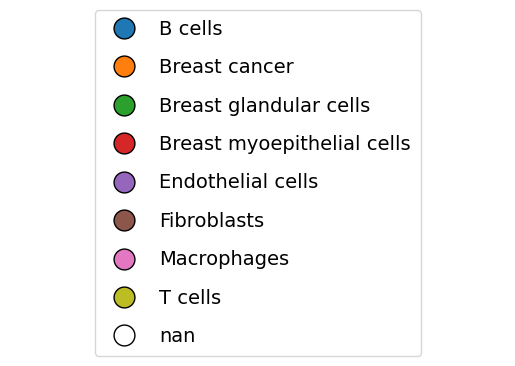

In [19]:
plot_colorlegend(xdcrop.viewer,
                 layer_name="main-cell_type_dc",
                 savepath="figures/test.pdf")

#### Continuous data

After adding the layer "density-mellon#Breast cancer" from "obsm" in the napari viewer, one can do following:

Saving figure to file figures/demo_legend.pdf
Saved.


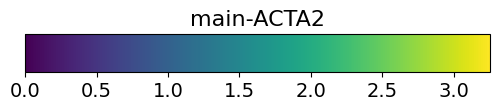

In [20]:
plot_colorlegend(xdcrop.viewer,
                 layer_name="main-ACTA2",
                 savepath="figures/demo_legend.pdf")

### Save currently displayed color legend

To save the currently in the napari viewer displayed color legend, one can use `save_current_colorlegend`. But it is important that the color legend is fully displayed in the viewer. If the color legend is cropped because the window of the widget is not wide enough, this will also be the case in the saved file.

In [21]:
xdcrop.save_current_colorlegend("figures/testtest.pdf")

Figure saved as figures/testtest.pdf


## Visualize effects along an axis

Alternatively to visualizing the cellular gene expression or density in 2D as shown above, it is also possible to visualize it along an axis. In the example scenario below we calculate the distance of each cell to the tumor center and visualize the cellular density and gene expression along this axis.

### Calculate distance of cells to annotations

To generate an axis we use here a selected set of annotations and calculate the distance of all cells to these annotations. For demonstration purposes we selected a region of the breast cancer dataset and annotated tumor cells within this region:
<center><img src="./demo_screenshots/tumor_region_annotation_example.png" width="600"/></center>

These annotations and the region can be imported from files in the repository but of course it would be also possible to do own annotations and select an own region and save the results using `.store_geometries()`.

In [38]:
from insitupy import calc_distance_of_cells_from

In [39]:
calc_distance_of_cells_from(
    data=xdcrop,
    annotation_key="Demo",
    annotation_class="Tumor center",
    # region_key="Tumor",
    # region_name="Selected Tumor"
)

Calculate the distance of cells from the annotation "Tumor center"
Saved distances to `.cells["main"].matrix.obsm["distance_from"]["Tumor center"]`


The distances can be accessed in `.cells.matrix.obsm["distance_from"]`

In [40]:
xdcrop.cells["main"].matrix.obsm["distance_from"]

,Tumor center
4353,231.644821
4356,226.342973
4358,213.661463
4359,216.604613
4390,226.413766
...,...
118567,135.302369
118569,156.354595
118570,162.485566
118575,147.131136


### Visualize the results using `napari`

Using `.show()` we can visualize the results and see the distance values per cell:
<center><img src="./demo_screenshots/distances_from_tumor_example.jpg" width="200"/></center>


## Plot cell abundance along axis

In addition to exploring the density of a certain cell type in two dimension, one can also explore it along a certain axis.

In [41]:
from insitupy.plotting import cell_abundance_along_axis

Retrieve `obs_val` from .obsm.


C:\Users\Anna Chernysheva\InSituPy\insitupy\plotting\expression_along_axis.py:874: UserWarning: The palette list has more values (20) than needed (9), which may not be intended.
  h = sns.kdeplot(data=data, x=axis,


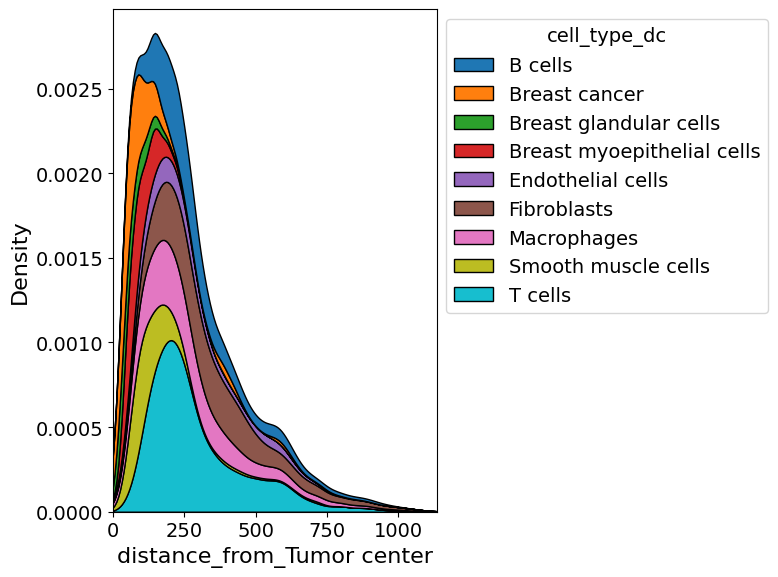

In [42]:
cell_abundance_along_axis(
    adata=xdcrop.cells["main"].matrix,
    axis=("distance_from", "Tumor center"),
    groupby="cell_type_dc",
    kde=True
)

Retrieve `obs_val` from .obsm.


C:\Users\Anna Chernysheva\InSituPy\insitupy\plotting\expression_along_axis.py:874: UserWarning: The palette list has more values (20) than needed (9), which may not be intended.
  h = sns.kdeplot(data=data, x=axis,


Saving figure to file figures/cell_abundance_along_axis.pdf
Saved.


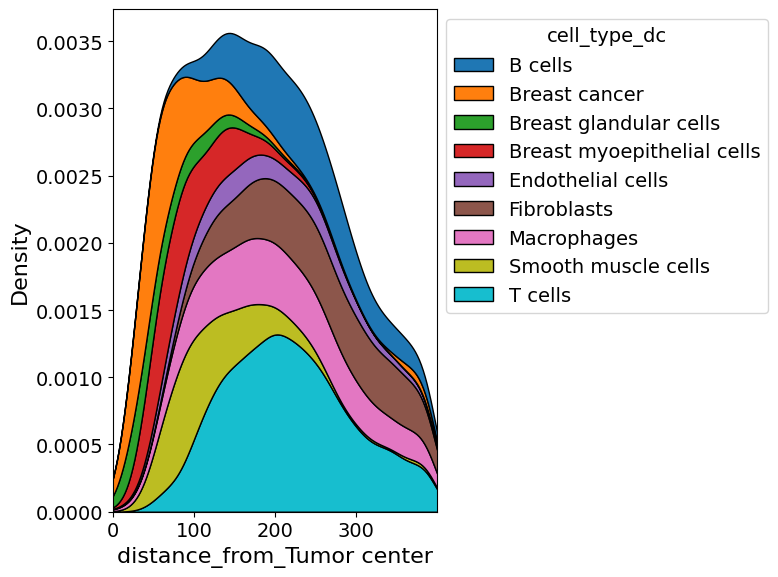

In [43]:
cell_abundance_along_axis(
    adata=xdcrop.cells["main"].matrix,
    axis=("distance_from", "Tumor center"),
    groupby="cell_type_dc",
    xlim=(0,400),
    kde=True,
    savepath="figures/cell_abundance_along_axis.pdf"
)

## Explore cellular density and gene expression along axis

In single-cell spatial transcriptomic data it is important to explore the gene expression on a cell type level. The `cell_expression_along_axis` function let's you do so.

Retrieve `obs_val` from .obsm.
Saving figure to file figures/gene_expr_along_axis_fibroblasts.pdf
Saved.


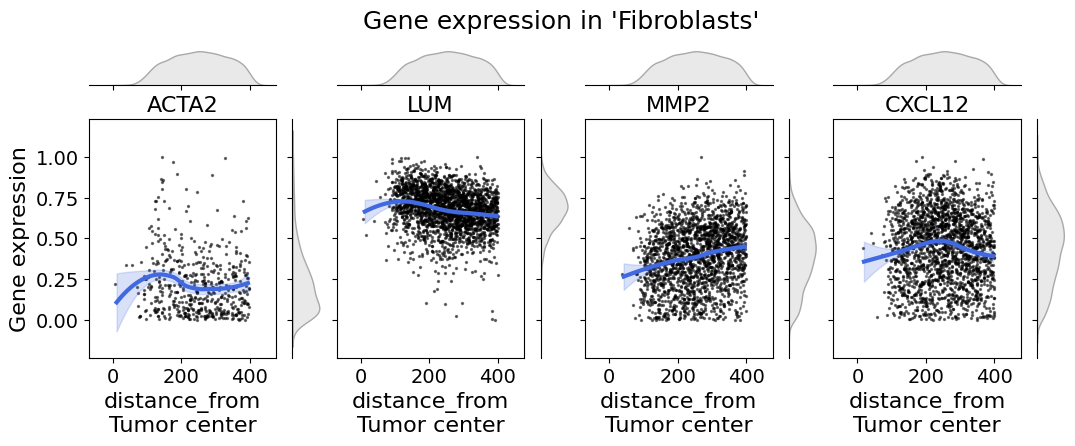

In [44]:
from insitupy.plotting import cell_expression_along_axis

# Example usage:
cell_expression_along_axis(
    adata=xdcrop.cells["main"].matrix,
    axis=("distance_from", "Tumor center"),
    cell_type_column="cell_type_dc",
    cell_type="Fibroblasts",
    genes=["ACTA2", "LUM", "MMP2", "CXCL12"],
    xlim=(0, 400),
    kde=False,
    fit_reg=True,
    min_expression=1.5,
    savepath="figures/gene_expr_along_axis_fibroblasts.pdf"
    )
